In [46]:
# Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

import warnings



In [47]:
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/USArrests.csv', index_col=0, header=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [48]:
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

### Pregunta 1

Realice una pequeña descripción estadística de las variables. ¿se justifica o no una estandarización de las variables cuantitativas?.


**Sí, se justifica la normalización de variables. Esto es porque tanto su rango como, medias y varianzas son suficiente disímiles entre sí. Al observar el cuadro de resumen y boxplot se notan claramente estas diferencias.**

In [49]:
X = df
X.columns = df.columns.tolist()

X.boxplot() 
X.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [50]:
#normalización

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

X2 = mean_norm(X)

X2.columns = X.columns
print(X2.head(3))

X3 = scale(X)
print(X3[:3,:])

X2

           Murder   Assault  UrbanPop      Rape
Alabama  1.242564  0.782839 -0.520907 -0.003416
Alaska   0.507862  1.106823 -1.211764  2.484203
Arizona  0.071633  1.478803  0.998980  1.042878
[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]]


,Murder,Assault,UrbanPop,Rape
Alabama,1.242564,0.782839,-0.520907,-0.003416
Alaska,0.507862,1.106823,-1.211764,2.484203
Arizona,0.071633,1.478803,0.998980,1.042878
Arkansas,0.232349,0.230868,-1.073593,-0.184917
California,0.278268,1.262814,1.758923,2.067820
Colorado,0.025715,0.398859,0.860809,1.864967
Connecticut,-1.030419,-0.729082,0.791723,-1.081741
Delaware,-0.433474,0.806838,0.446294,-0.579946
Florida,1.747671,1.970778,0.998980,1.138967
Georgia,2.206860,0.482855,-0.382735,0.487702


### Pregunta 2

2. Considere que buscar realizar 3 grupos con el conjunto de datos anterior:

(a) (10 pts) Agrupar los observaciones mediante enlace simple, completo y ward, junto con las métricas Euclidiana y Manhattan. Visualice los agrupamiento mediante sus respectivos dendrograma.


In [51]:
dist1 = pairwise_distances(X=X2,  metric ='euclidean')
dist2 = pairwise_distances(X=X2,  metric ='manhattan')

print(dist1*dist1)
print(dist1)
print(dist2)


[[ 0.          7.31028609  5.26023278 ...  9.76154469 12.28315357
   3.34561684]
 [ 7.31028609  0.          7.29347205 ... 20.25410214 23.72814438
  12.24541987]
 [ 5.26023278  7.29347205  0.         ... 20.22677731 15.54398956
   7.2484942 ]
 ...
 [ 9.76154469 20.25410214 20.22677731 ...  0.          4.1245101
   3.54252609]
 [12.28315357 23.72814438 15.54398956 ...  4.1245101   0.
   3.04375685]
 [ 3.34561684 12.24541987  7.2484942  ...  3.54252609  3.04375685
   0.        ]]
[[0.         2.70375407 2.29351974 ... 3.12434708 3.50473302 1.82910274]
 [2.70375407 0.         2.7006429  ... 4.50045577 4.87115432 3.49934563]
 [2.29351974 2.7006429  0.         ... 4.49741896 3.94258666 2.69230277]
 ...
 [3.12434708 4.50045577 4.49741896 ... 0.         2.03088899 1.88215995]
 [3.50473302 4.87115432 3.94258666 ... 2.03088899 0.         1.74463659]
 [1.82910274 3.49934563 2.69230277 ... 1.88215995 1.74463659 0.        ]]
[[0.         4.23716177 4.43307607 ... 6.1649906  6.29262482 3.10541076]


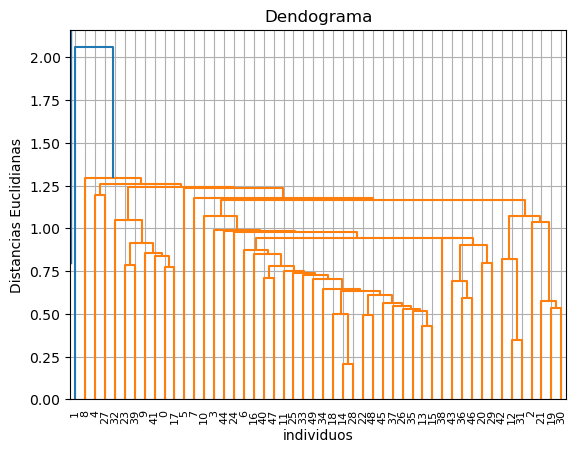

In [52]:
dendrogram1 = sch.dendrogram(sch.linkage(X2, method='single'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

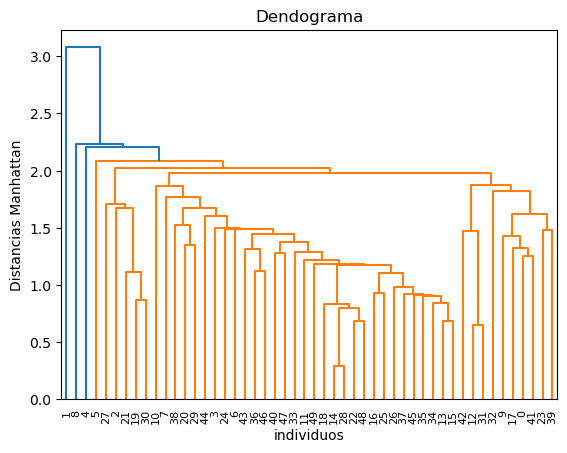

In [53]:
dendrogram1 = sch.dendrogram(sch.linkage(X2, method='single', metric='cityblock'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Manhattan')
plt.show()

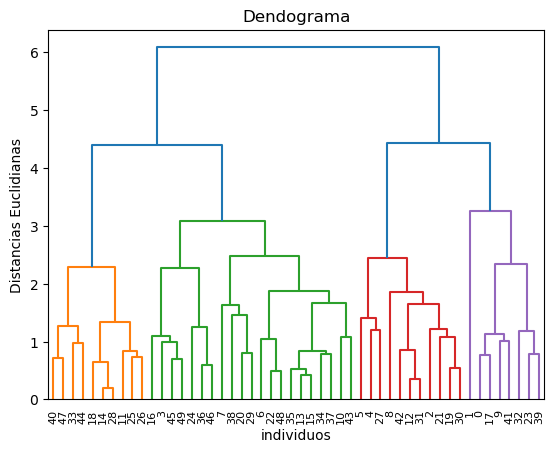

In [54]:
dendrogram2 = sch.dendrogram(sch.linkage(X2, method='complete'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

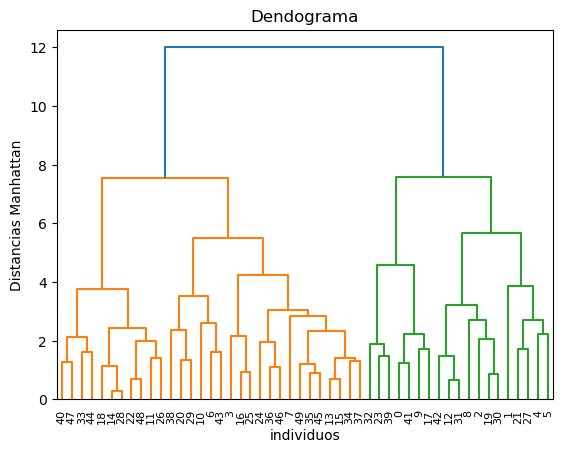

In [55]:
dendrogram1 = sch.dendrogram(sch.linkage(X2, method='complete', metric='cityblock'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Manhattan')
plt.show()

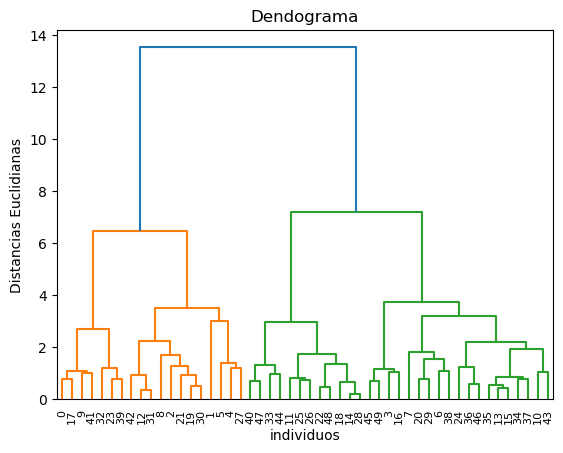

In [56]:
dendrogram2 = sch.dendrogram(sch.linkage(X2, method='ward'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

(b) (5 pts) Escoja uno de los métodos aglomerativos (métrica y enlace), con este, crear los 3 grupos y comparar los clúster obtenidos, en términos de promedio y desviación estándar.



In [58]:
#Enlace completo con distancias de manhattan
hc = AgglomerativeClustering(n_clusters = 3, 
                    metric = 'manhattan', 
                    linkage = 'complete')

y_hc = hc.fit_predict(X2)

X['cluster'] = y_hc

grp = X.groupby('cluster', as_index=False).agg(["std", "mean"])


In [59]:
#Datos originales
grp

Murder               Assault               UrbanPop             \
              std       mean        std        mean        std       mean   
cluster                                                                     
0        2.383902   5.003226  48.059596  116.483871  14.210552  63.838710   
1        2.100361  10.966667  38.069315  264.000000  11.090537  76.500000   
2        1.693826  14.671429  48.376007  251.285714   8.538429  54.285714   

             Rape             
              std       mean  
cluster                       
0        5.802395  16.338710  
1        7.443051  33.608333  
2        4.031306  21.685714

(c) (10 pts) Realice un agrupamiento considerando 3 grupos utilizando la técnica K-medias.
Comparar los clúster obtenidos, en términos de promedio y desviación estándar.


In [60]:
# Modelo KMeans 
modelo_kmeans = KMeans(n_clusters=3, n_init=25, random_state=0)
modelo_kmeans.fit(X=X2)

y_km = modelo_kmeans.predict(X=X2)

X['cluster'] = y_km

grp = X.groupby('cluster', as_index=False).agg(["std", "mean"])

In [61]:
#Datos originales
grp

Murder               Assault            UrbanPop             \
              std       mean        std     mean        std       mean   
cluster                                                                  
0        1.647207   5.656250  41.175842  138.875   8.935883  73.875000   
1        2.684904  12.165000  44.116920  255.250  14.463748  68.400000   
2        2.661529   3.971429  38.697545   86.500   9.706970  51.928571   

             Rape            
              std      mean  
cluster                      
0        5.236439  18.78125  
1        8.386473  29.16500  
2        3.692196  12.70000

### Pregunta 3

(8 pts) Utilice las técnicas del codo, de Hartigan y Silhuette para seleccionar la cantidad óptima
de grupos utilizando algún método de agrupamiento jerárquico (deben fijar una métrica y un
tipo de enlace). En caso que los algoritmos entreguen diferentes valores de K seleccionar una
metodología e interpretar los grupos obtenidos.


In [62]:
## Calcula de las suma intra 
def sum_intra(df_input, y_hc):
    DW = []
    for n_cluster in range(0, max(y_hc)+1):
        DW_aux = pairwise_distances(X=df_input[y_hc==n_cluster],  metric ='manhattan')
        DW.append(DW_aux.sum())
        return sum(DW)

In [63]:
#Método del codo

range_n_clusters = range(1, 15)
SW = []

for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, 
                    metric = 'manhattan', 
                    linkage = 'complete')

    y_hc = hc.fit_predict(X2)
    SW.append(sum_intra(X2, y_hc))



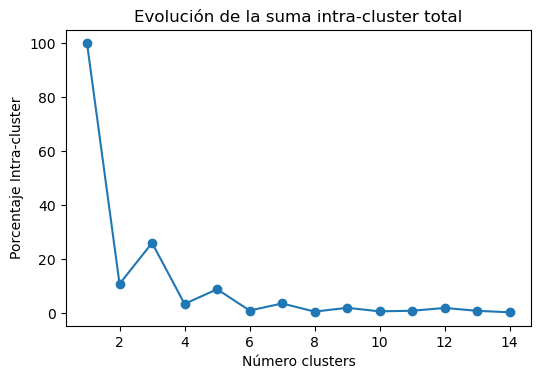

In [64]:
#Método del codo
#Puede ser K=2 o K=4 

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, SW/SW[0]*100, marker='o')
ax.set_title("Evolución de la suma intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Porcentaje Intra-cluster')
plt.show()

In [65]:
# Método Silhouette


range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, 
                    metric = 'manhattan', 
                    linkage = 'complete')

    y_hc = hc.fit_predict(X2)
    silhouette_avg = silhouette_score(X2, y_hc)
    valores_medios_silhouette.append(silhouette_avg)
    


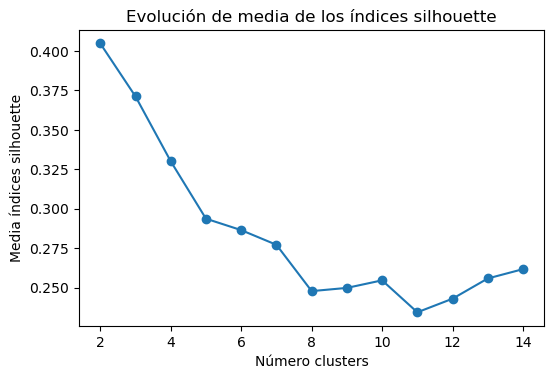

In [66]:
#Selecciona K = 2

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')
plt.show()

In [67]:
# Método Hartigan

range_n_clusters = range(1, 15)
SW = []

for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, 
                    metric = 'manhattan', 
                    linkage = 'complete')

    y_hc = hc.fit_predict(X2)
    SW.append(sum_intra(X2, y_hc))
 


[11232.7108643   1209.30663491  2920.08571512   374.2630934
   989.60127548    99.94750775   394.81905803    55.67135843
   214.25641285    65.85933602    91.59610268   208.41281254
    87.25446936    27.45212784]
[414.4 -28.7 326.5 -29.2 409.5 -33.6 268.  -31.8  94.6 -11.5 -22.4  54.2
  82.8]


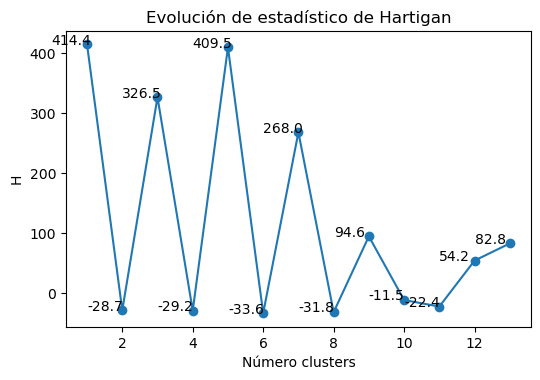

In [68]:
#Selecciona K=2

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'left')

SW=np.array(SW)
K=np.arange(15)
H=np.around((SW[0:13]/SW[1:14]-1)*(len(X2)-K[0:13]), decimals=1)
print(SW)
print(H)

x = K=np.arange(1, 14)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range(1, 14), H, marker='o')
ax.set_title("Evolución de estadístico de Hartigan")
ax.set_xlabel('Número clusters')
ax.set_ylabel('H')
addlabels(x, H)
plt.show()

In [69]:
#2 clústers por método de Silhouette
hc = AgglomerativeClustering(n_clusters = 2, 
                    metric = 'manhattan', 
                    linkage = 'complete')
y_hc = hc.fit_predict(X2)
X['cluster'] = y_hc

grp = X.groupby('cluster').agg(['std', 'mean'])

X.sort_values('cluster')


,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,0
North Carolina,13.0,337,45,16.1,0
Nevada,12.2,252,81,46.0,0
Mississippi,16.1,259,44,17.1,0
Michigan,12.1,255,74,35.1,0
Maryland,11.3,300,67,27.8,0
Louisiana,15.4,249,66,22.2,0
South Carolina,14.4,279,48,22.5,0
New York,11.1,254,86,26.1,0
Tennessee,13.2,188,59,26.9,0


In [70]:
grp

Murder               Assault               UrbanPop             \
              std       mean        std        mean        std       mean   
cluster                                                                     
0        2.650168  12.331579  41.297098  259.315789  14.855050  68.315789   
1        2.383902   5.003226  48.059596  116.483871  14.210552  63.838710   

             Rape             
              std       mean  
cluster                       
0        8.613121  29.215789  
1        5.802395  16.338710

El algoritmo jerárquico con enlace completo y distancias de Manhattan, evaluado mediante la técnica de Hartigan genera 2 grupos. uno con indicadores más altos (clúster 0) y mayor población urbana y otro con indicadores más bajos y menor población urbana (clúster 1).

### Pregunta 4

4. (8 pts) Utilice las ténicas del codo, de Hartigan y Silhuette para seleccionar la cantidad óptima de grupos utilizando el algoritmo K-medias. En caso que los algoritmos entreguen diferentes valores de K seleccionar una metodología e interpretar los grupos obtenidos. 


In [71]:
#Harting

range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 1
                    )
    modelo_kmeans.fit(X2)
    inertias.append(modelo_kmeans.inertia_)

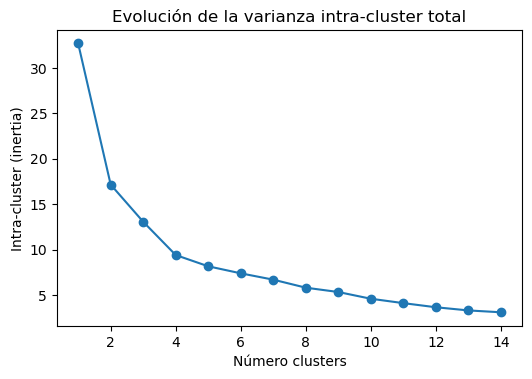

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, np.array(inertias)/600*100, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')
plt.show()

[196.         102.86240049  78.356372    56.40317346  48.96981879
  44.33132806  40.14877322  34.85955067  31.99891696  27.55841225
  24.66587788  21.94604113  19.85237264  18.62699255]
[45.3 15.3 18.7  7.1  4.8  4.7  6.7  3.8  6.8  4.8  5.   4.1  2.5]


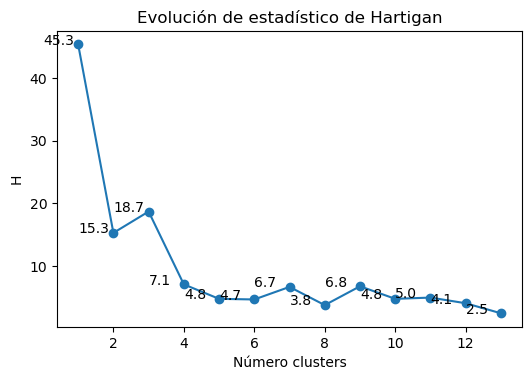

In [73]:
#Selecciona K=4

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'left')

SW=np.array(inertias)
K=np.arange(15)
H=np.around((SW[0:13]/SW[1:14]-1)*(len(X2)-K[0:13]), decimals=1)
print(SW)
print(H)

x = K=np.arange(1, 14)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range(1, 14), H, marker='o')
ax.set_title("Evolución de estadístico de Hartigan")
ax.set_xlabel('Número clusters')
ax.set_ylabel('H')
addlabels(x, H)
plt.show()

In [74]:
# Método Silhouette

range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 1
                    )
    y_km = modelo_kmeans.fit_predict(X2)
    silhouette_avg = silhouette_score(X2, y_km)
    valores_medios_silhouette.append(silhouette_avg)
    

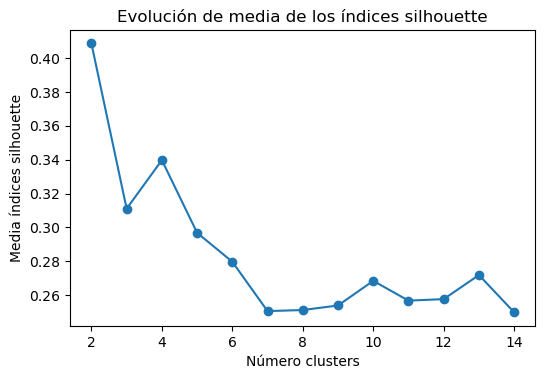

In [75]:
#Selecciona K=2
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')
plt.show()

In [76]:
#4 clústers por método de Harting
modelo_kmeans = KMeans(
                        n_clusters   = 4, 
                        n_init       = 20, 
                        random_state = 1
                    )
y_km = modelo_kmeans.fit_predict(X2)
X['cluster'] = y_km

grp = X.groupby('cluster').agg(['std', 'mean'])

X.sort_values('cluster')


,Murder,Assault,UrbanPop,Rape,cluster
Missouri,9.0,178,70,28.2,0
Nevada,12.2,252,81,46.0,0
Illinois,10.4,249,83,24.0,0
New Mexico,11.4,285,70,32.1,0
New York,11.1,254,86,26.1,0
Michigan,12.1,255,74,35.1,0
Florida,15.4,335,80,31.9,0
Colorado,7.9,204,78,38.7,0
California,9.0,276,91,40.6,0
Texas,12.7,201,80,25.5,0


In [77]:
grp.sort_values([('UrbanPop', 'mean')])

Murder               Assault               UrbanPop             \
              std       mean        std        mean        std       mean   
cluster                                                                     
2        2.362555   3.600000  25.708674   78.538462  10.086803  52.076923   
1        2.601614  13.937500  49.753500  243.625000   8.048957  53.750000   
3        1.647207   5.656250  41.175842  138.875000   8.935883  73.875000   
0        2.083605  10.815385  43.559420  257.384615  10.770330  76.000000   

             Rape             
              std       mean  
cluster                       
2        3.258618  12.176923  
1        3.811425  21.412500  
3        5.236439  18.781250  
0        7.282337  33.192308

El algoritmo de KMeans con 4 grupos, genera 2 subgrupos con alta población urbana (clústers 1 y 2) y otro con baja población urbana (0 y 3) y dentro de ellos están los que tienen altos indicadores (1 y 3, respectivamente) y los que tienen indicadores más bajos (2 y 0)

### Pregunta 5

Realizar el análisis de componentes principales al conjunto de Datos. Interpretar.


In [88]:
X = df

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X2)<

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Se combierte el array a dataframe para añadir nombres a los ejes.
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X2.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62006039 0.24744129 0.0891408  0.04335752]


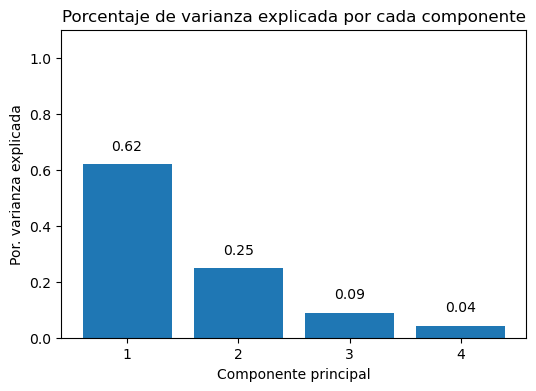

In [91]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X2.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')
plt.show()

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62006039 0.86750168 0.95664248 1.        ]


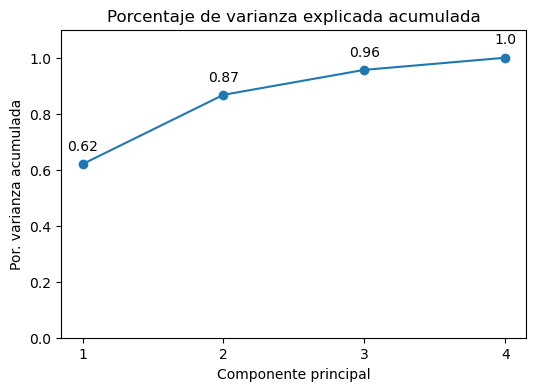

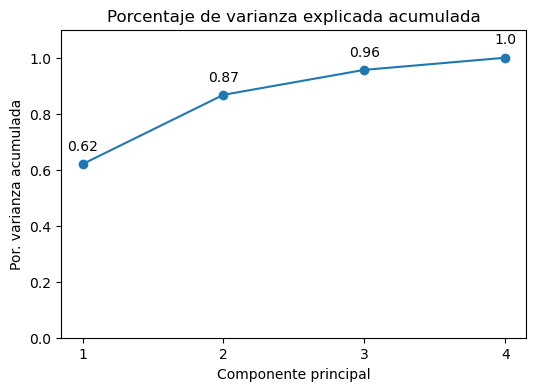

In [94]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X2.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X2.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

In [102]:
proyecciones = pca_pipe.transform(X=X2)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = X2.index
)
proyecciones

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


### Pregunta 6

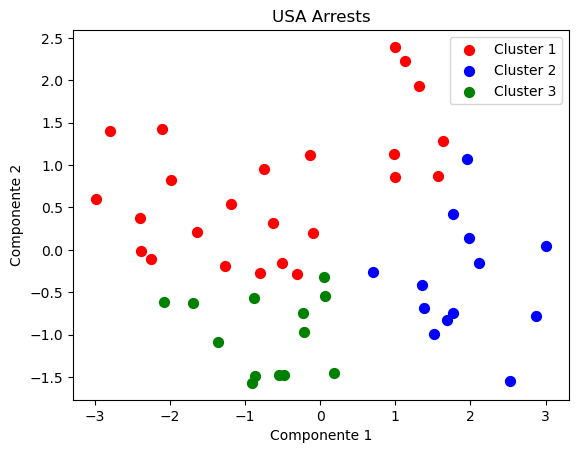

In [106]:
hc = AgglomerativeClustering(n_clusters = 3, 
                metric = 'manhattan', 
                linkage = 'complete')

y_hc = hc.fit_predict(X=proyecciones)


# Visualizacion primeras 2 componentes principales 
plt.scatter(proyecciones['PC1'][y_hc == 0], proyecciones['PC2'][y_hc == 0], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(proyecciones['PC1'][y_hc == 1], proyecciones['PC2'][y_hc == 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(proyecciones['PC1'][y_hc == 2], proyecciones['PC2'][y_hc == 2], s = 50, c = 'green', label = 'Cluster 3')

plt.title('USA Arrests')
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.show()

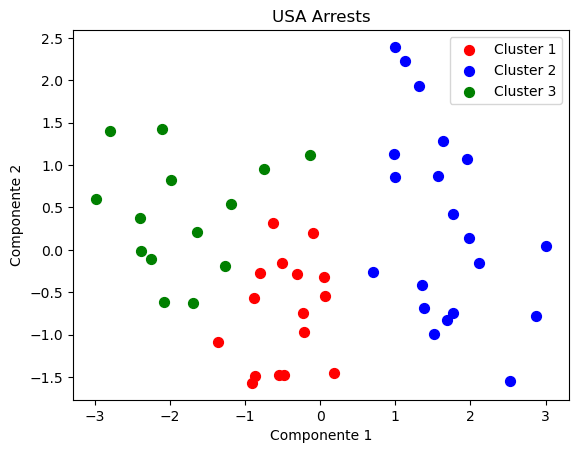

In [105]:
modelo_kmeans = KMeans(n_clusters=3, n_init=25, random_state=0)
#modelo_kmeans.fit(X=X2)
modelo_kmeans.fit(X=proyecciones)

y_km = modelo_kmeans.predict(X=proyecciones)


# Visualizacion primeras 2 componentes principales 
plt.scatter(proyecciones['PC1'][y_km == 0], proyecciones['PC2'][y_km == 0], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(proyecciones['PC1'][y_km == 1], proyecciones['PC2'][y_km == 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(proyecciones['PC1'][y_km == 2], proyecciones['PC2'][y_km == 2], s = 50, c = 'green', label = 'Cluster 3')

plt.title('USA Arrests')
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.show()

In [ ]:
#De Hartigans

In [ ]:
def compute_inertia(a, X):
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max=5, n_references=5):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

k_max = 15
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(), X2, k_max)


plt.plot(range(1, k_max+1), reference_inertia,
         '-o', label='reference')
plt.plot(range(1, k_max+1), ondata_inertia,
         '-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.show()
